# Regresión Logistica Lineal: Decision Boundary 
- Alumno: Renzo Alessandro Sucari Velásquez
- Dataset: Diabetes 
  - Link: https://www.kaggle.com/saurabh00007/diabetescsv
  - Descripción: Este conjunto de datos contiene las siguientes caracteristicas: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
  - 761 instancias
  - 70% train y 30% test 
- Valor a predecir (y): Si/No
- Valores de x tomadas: Glucose/Age


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [15]:
test = pd.read_csv('diabetes_test.csv')
train = pd.read_csv('diabetes_train.csv')
#x_train = train.iloc[:,0]
x_ones = np.ones((train.shape[0],1))

x_train = np.ones((train.shape[0],train.shape[1]))
x_train[:,0]=np.ones((train.shape[0],1))[:,0]
x_train[:,1]=train.iloc[:,0]
x_train[:,2]=train.iloc[:,1]
y_train = np.ones((train.shape[0],1))
y_train = train.iloc[:,2]

x_test = np.ones((test.shape[0],test.shape[1]))
x_test[:,1]=test.iloc[:,0]
x_test[:,2]=test.iloc[:,1]
y_test = np.ones((train.shape[0],1))
y_test = test.iloc[:,2]

In [3]:
def normalizar(datos):
    if(datos.ndim==1):
        return (datos - datos.min()) / (datos.max() - datos.min())
    else:
    
        ndatos=np.zeros ((datos.shape[0],datos.shape[1]))
        for a in range(datos.shape[1]):
            if(datos[:,a].min()<datos[:,a].max()):
                col=(datos[:,a] - datos[:,a].min()) / (datos[:,a].max() - datos[:,a].min())
            else:
                col=datos[:,a]
            ndatos[:,a]=col
        return ndatos

Text(0, 0.5, '$Glucosa$')

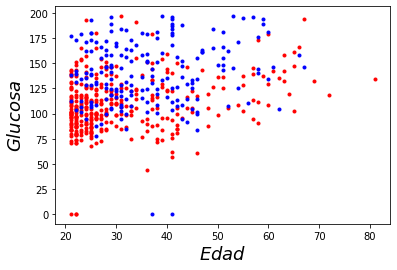

In [4]:
grafica=plt.plot(x_train[:343,1],x_train[:343,2],'r.')
grafica=plt.plot(x_train[343:,1],x_train[343:,2],'b.')

plt.xlabel("$Edad$", fontsize=18)
plt.ylabel("$Glucosa$", rotation=90, fontsize=18)

In [5]:
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

In [6]:
def hipotesis(theta, x):
    return sigmoid(np.dot(x, theta))

In [7]:
def cal_cost(theta,x,y):
    m = x.shape[0]    
    h = hipotesis(theta, x)
    pri = np.matmul(y.T, (np.log(h))[:,0] )
    seg = np.matmul((1 - y).T, (np.log(1 - h))[:,0]  )   
    return -(1/m) * np.sum(pri + seg)

In [8]:
def gradiente(x,y,theta,alpha,itera):
    m = x.shape[0]
    cost_h = np.zeros(itera)
    theta_h = np.zeros ((itera,x.shape[1]))
    for ite in range(itera):
        h = hipotesis(theta, x)
        theta[:,0] = theta[:,0] - (alpha) * (x.T.dot(h[:,0]-y))
        theta_h[ite,:] = theta.T
        cost_h[ite] = cal_cost(theta,x,y)
    return theta,theta_h,cost_h

In [9]:
iteraciones = 1000
alph = 0.01
theta = np.random.randn (3,1)
x_train=normalizar(x_train)
#cal_cost(theta,x_train,y_train)
theta,theta_h,cost_h=gradiente(x_train,y_train,theta,alph,iteraciones)
theta
#print(theta)

array([[-4.87217206],
       [ 0.99156918],
       [ 6.42871133]])

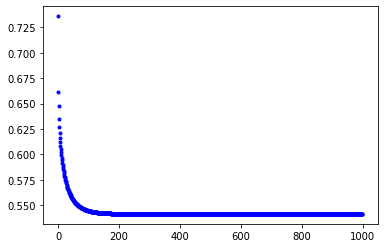

In [10]:
grafica=plt.plot(np.arange(cost_h.shape[0]),cost_h,'b.')

In [11]:
def getx(theta,x1):
    x2 = []
    for i in range(len(x1)):
        x2.append( -(theta[0,0]+ (theta[1,0]*x1[i]) )/theta[2,0])
    return x2

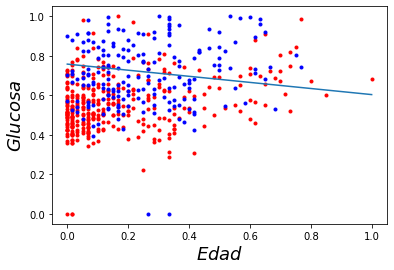

In [12]:
grafica=plt.plot(x_train[:343,1],x_train[:343,2],'r.')
grafica=plt.plot(x_train[343:,1],x_train[343:,2],'b.')
#grafica=plt.plot([30,40,50],[30,40,50],'r.')

plt.xlabel("$Edad$", fontsize=18)
plt.ylabel("$Glucosa$", rotation=90, fontsize=18)

x_line=np.linspace(0, 1, num=x_train.shape[0])
getx(theta,x_line)
#hipo=hipotesis(theta,x_train)
#hipo
plt.plot(x_line,getx(theta,x_line), linestyle='solid')


